**Welcome to Disease Prediction from Medical Data in Python jypter Notebook**

**In this notebook, I learn about evaluating machine learning models to classify Disease Prediction. It help me to develop my skills to build a model that can accurately predict the credit score of an individual based on personal information and financial history. It involves data cleaning, data preprocessing, data analysis, classification, and data visualization to solve the practical problems.**


**Column Descriptions:**

| Column Name | Description |
|-------------|-------------|
| `id`        | Unique id for each patient |
| `age`       | Age of the patient in years |
| `sex`       | Male/Female |
| `cp`        | Chest pain type (1. typical angina, 2. atypical angina, 3. non-anginal, 4. asymptomatic) |
| `trestbps`  | Resting blood pressure (in mm Hg on admission to the hospital) |
| `chol`      | Serum cholesterol in mg/dl |
| `fbs`       | If fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`   | Resting electrocardiographic results (Values: normal, stt abnormality, lv hypertrophy) |
| `thalach`   | Maximum heart rate achieved |
| `exang`     | Exercise-induced angina (True/ False) |
| `oldpeak`   | ST depression induced by exercise relative to rest |
| `slope`     | The slope of the peak exercise ST segment |
| `ca`        | Number of major vessels (0-3) colored by fluoroscopy |
| `thal`      | Thalassemia (Values: normal, fixed defect, reversible defect) |
| `target`       | The predicted attribute, target [0=no heart disease; 1,2,3,4 = stages of heart disease ] |


**Import Libraries**

Let's start by importing all necessary libraries that we will need.

In [1]:
# Library for data analysis
import numpy as np
import pandas as pd

# Library for data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Library for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Library for model selection and splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Pipeline for model Workflows
from sklearn.pipeline import Pipeline

# Libraries for classification algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Library for evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv(r'C:\Users\user\Desktop\Github/heart.csv')

#Diplay the last 30 rows of the dataset
data.tail(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
995,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
997,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
998,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
999,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
1000,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **<font color='Red'>Exploratory Data Analysis</font>**

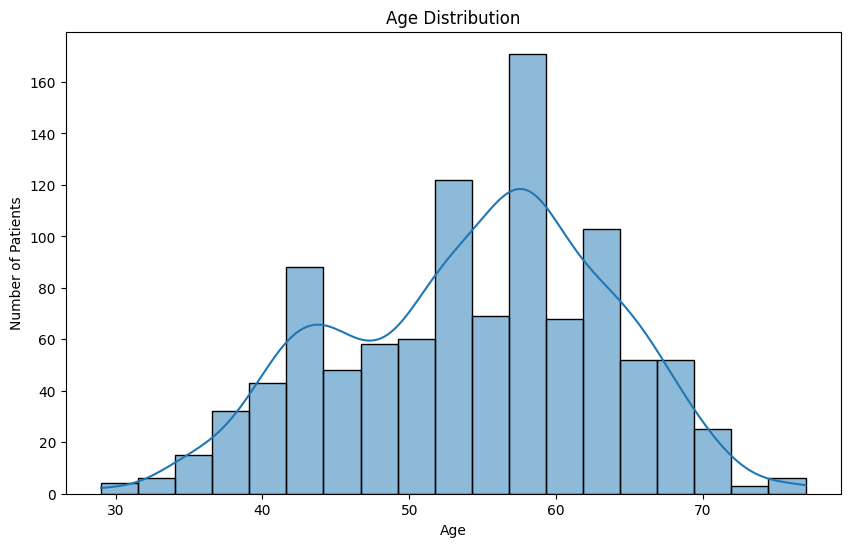

In [5]:
#Plotting histogram with Kernel Density Estimate Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

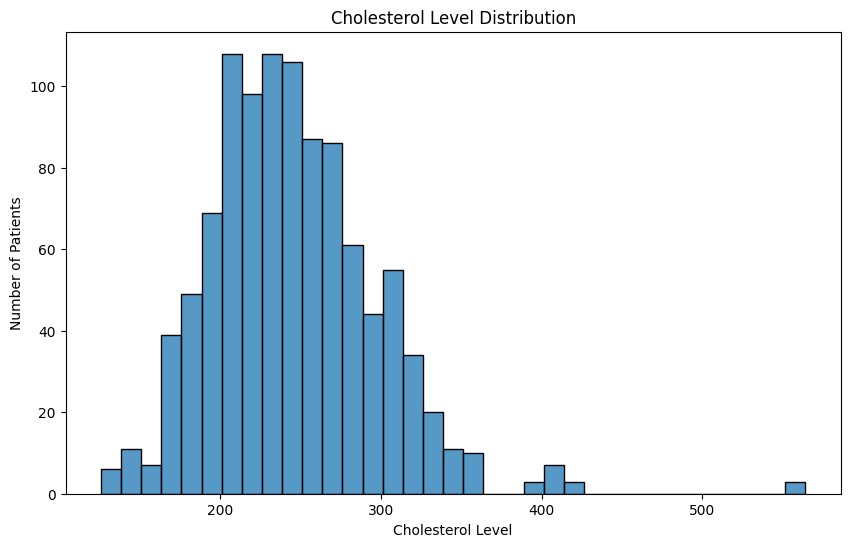

In [9]:
#Plotting histogram that visualizes the distribution of cholesterol Level distribution among patients
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'], kde=False)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.show()

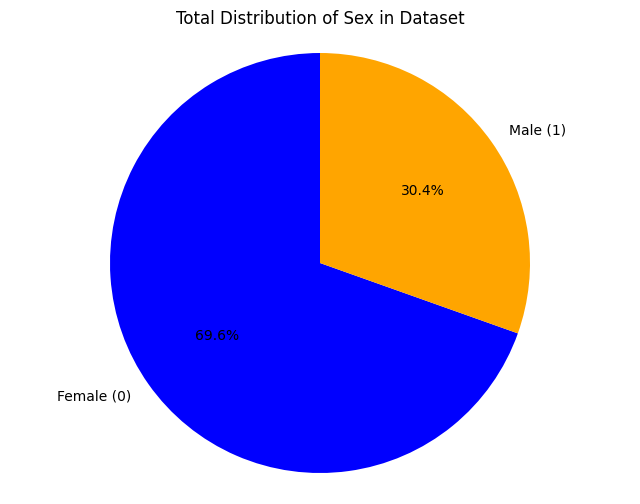

In [10]:
# Calculate the count of each gender in the dataset
gender_counts = data['sex'].value_counts()  # This creates a Series with counts of each gender

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create a pie chart with the gender distribution
plt.pie(gender_counts, 
        labels=['Female (0)', 'Male (1)'],  # Labels for each slice
        autopct='%1.1f%%',  # Format for displaying percentage
        startangle=90,  # Start the pie chart at 90 degrees
        colors=['blue', 'orange'])  # Colors for each gender

# Set the title of the plot
plt.title('Total Distribution of Sex in Dataset')  

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()  

Visualizing the presence of heart disease based on gender

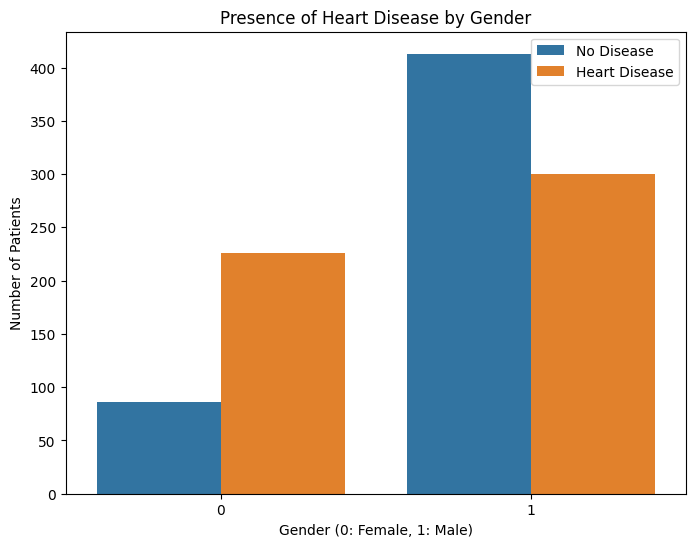

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data, hue='target')
plt.title('Presence of Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Heart Disease'])
plt.show()


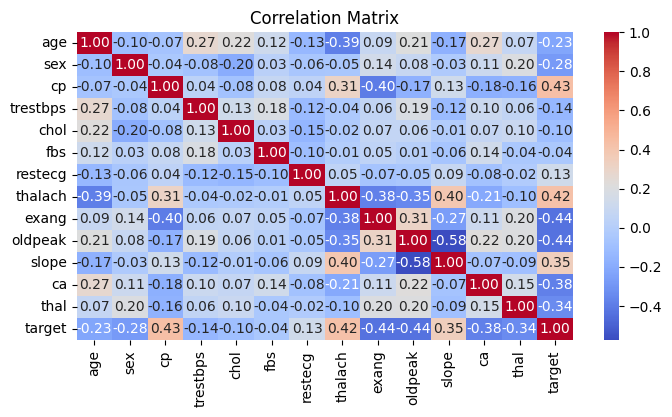

In [12]:
# Visualizing the Correlation matrix of variables
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

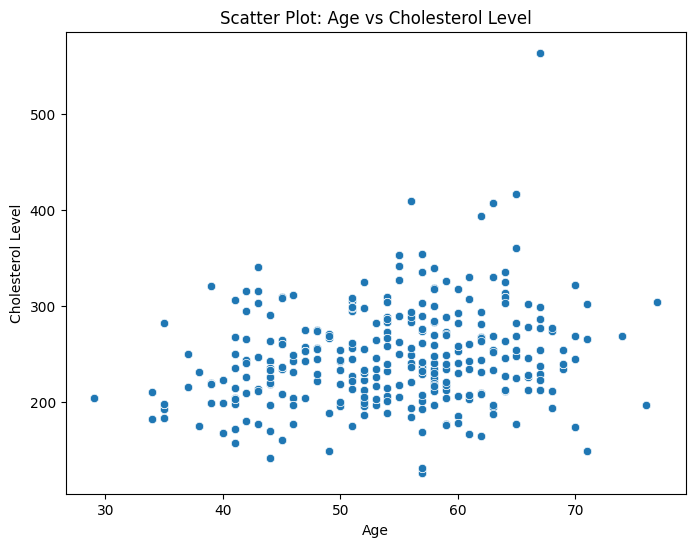

In [13]:
# Scatter plot between age and cholesterol level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data)
plt.title('Scatter Plot: Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()


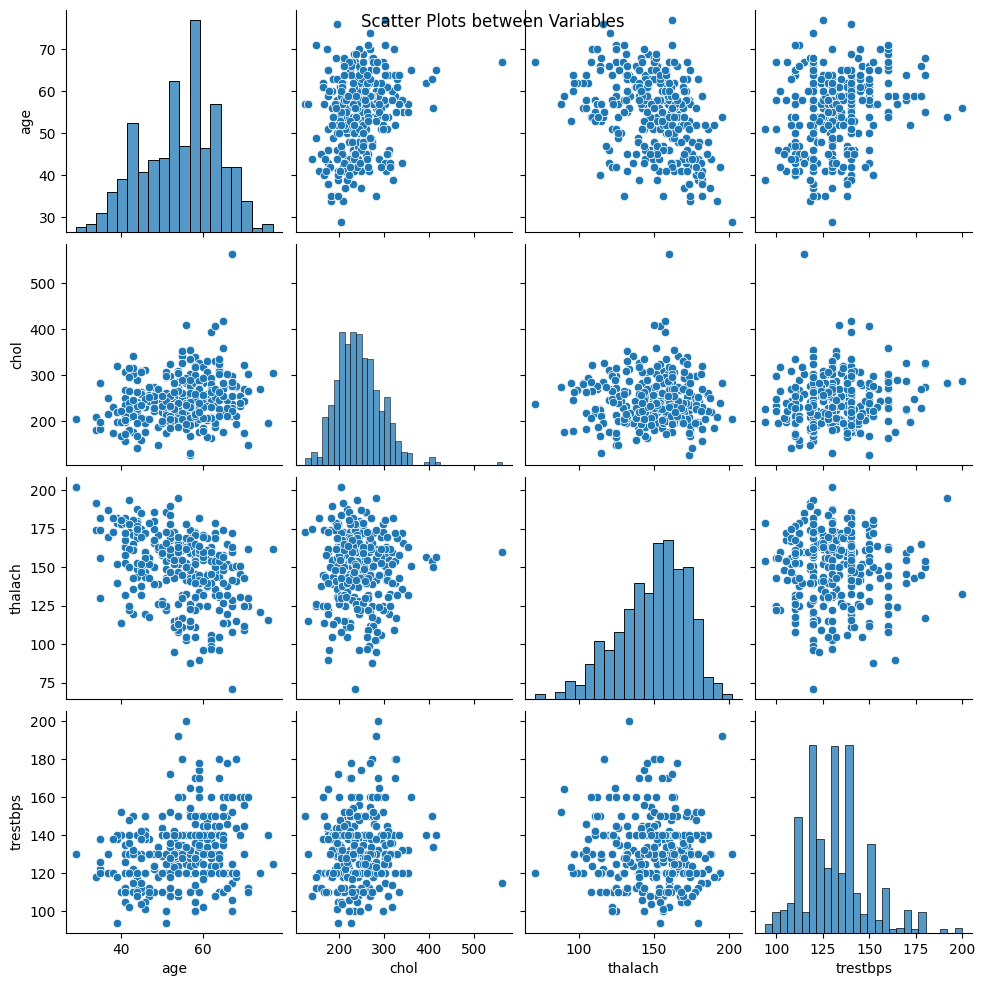

In [14]:
# Scatter plots between the variables 'age', 'chol', 'thalach', and 'trestbps'
sns.pairplot(data[['age', 'chol', 'thalach', 'trestbps']])
plt.suptitle('Scatter Plots between Variables')
plt.show()


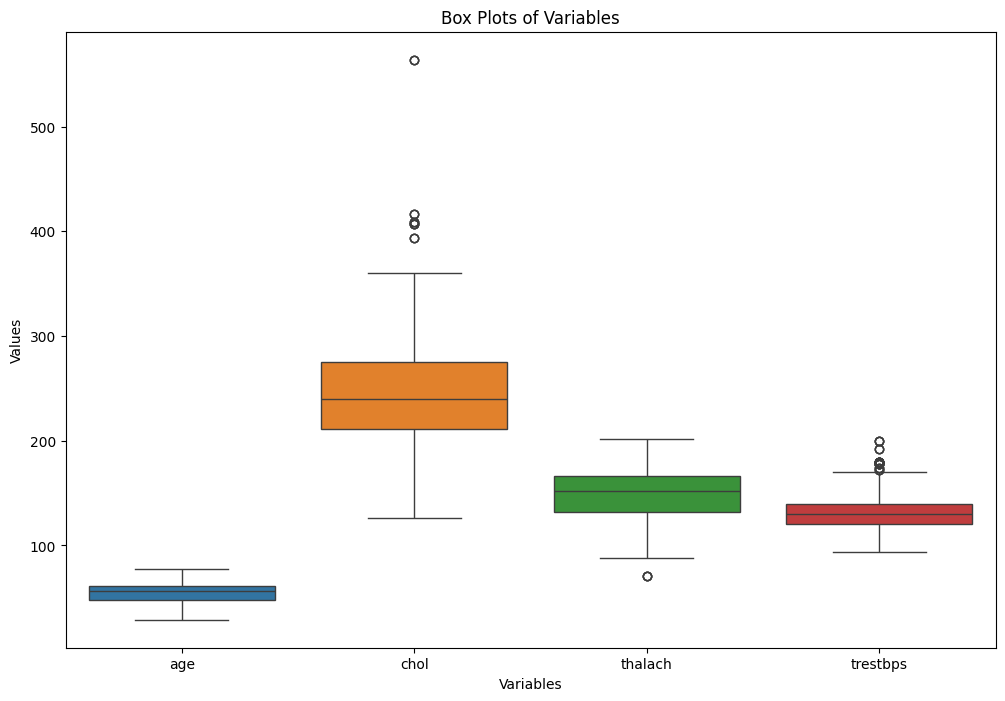

In [15]:
# Box plots to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])
plt.title('Box Plots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

**Separation of Categorical Variables from Numerical Variables**
The code separates the column of a dataset into two lists, one for categorical varibales and another for Numerical Variables-by checking the data types of each column. This separation is useful in data analysis and preprocessing as Categorical and Numerical Datas often require different data handling techniques.

In [17]:
# Select categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Select numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print categorical variables
print("Categorical variables:", categorical_cols)

# Print numerical variables
print("Numerical variables:", numerical_cols)


Categorical variables: []
Numerical variables: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [18]:
import pandas as pd #"One Hot Encoding"
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Separation of categorical and numerical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Copying the original DataFrame for processing
df_processed = data.copy()

#Encoding categorical variables with LabelEncoder
label_encoder = LabelEncoder()
df_processed[categorical_cols] = df_processed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

#Scaling numerical variables with StandardScaler
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

#Splitting the dataset into training and test data
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1    -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2     1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3     0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4     0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.503520    1   1  0.479107 -0.484803    0        1  0.647366      1   
1021  0.613800    1   0 -0.377636  0.232705    0        0 -0.352873      1   
1022 -0.819834    1   0 -1.234378  0.562371    0        0 -1.353113      1   
1023 -0.488996    0   0 -1.234378  0.155137    0        0  0.429923      0   
1024 -0.047877    1   0 -0.663216 -1.124743    0        1 -1.570556      0   

       oldpeak  slope  ca  thal  
0    -0.060888      2   2    

In [19]:
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=8),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=200)
}

# Dictionary to store accuracies
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

KNeighborsClassifier
Scores: [0.86407767 0.7961165  0.86407767 0.80582524 0.87378641 0.87254902
 0.7745098  0.87254902 0.7745098  0.78431373]
Mean Score: 0.828231486769465
GaussianNB
Scores: [0.85436893 0.88349515 0.87378641 0.76699029 0.84466019 0.88235294
 0.76470588 0.78431373 0.75490196 0.80392157]
Mean Score: 0.821349704930516
SVC
Scores: [0.89320388 0.98058252 0.93203883 0.88349515 0.90291262 0.96078431
 0.85294118 0.88235294 0.84313725 0.8627451 ]
Mean Score: 0.8994193794022465
DecisionTreeClassifier
Scores: [1.         1.         1.         0.97087379 1.         1.
 1.         1.         1.         1.        ]
Mean Score: 0.9970873786407767
LogisticRegression
Scores: [0.87378641 0.90291262 0.87378641 0.83495146 0.84466019 0.89215686
 0.80392157 0.83333333 0.78431373 0.80392157]
Mean Score: 0.8447744146202171


**This code provides comprehensive evaluation of each classifier performance on both the training and test datasets. The use of confusion matrix and classification report provides a detailed look into each model's prediction quality, highlighting strengths and areas for potential improvement**.

Confusion Matrix:
 [[78 24]
 [17 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       102
           1       0.78      0.83      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

Accuracy on train data by KNeighborsClassifier Classifier: 89.14634146341463
Accuracy on test data by KNeighborsClassifier Classifier: 80.0


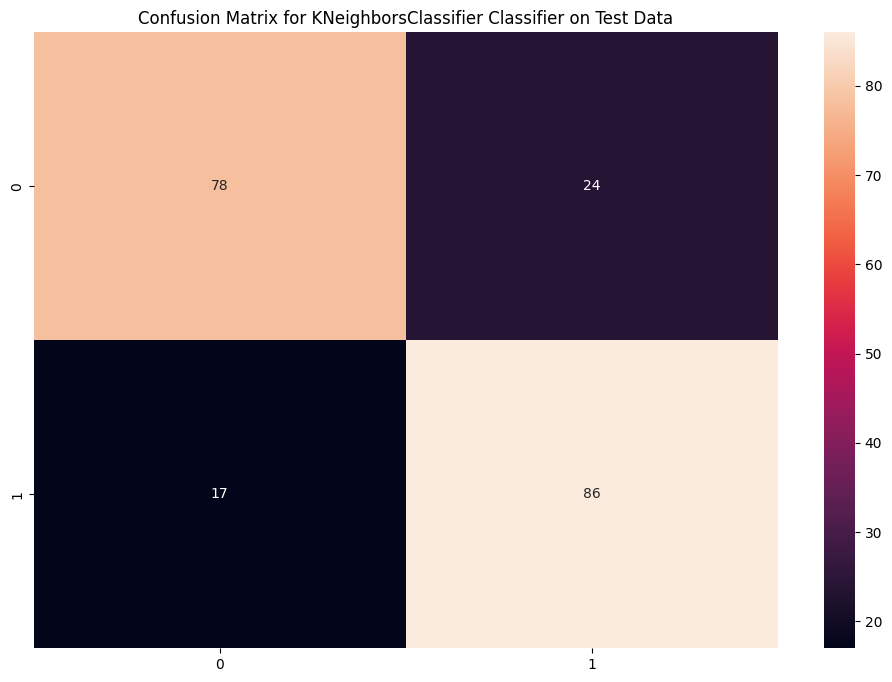

Confusion Matrix:
 [[72 30]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Accuracy on train data by GaussianNB Classifier: 83.90243902439025
Accuracy on test data by GaussianNB Classifier: 80.0


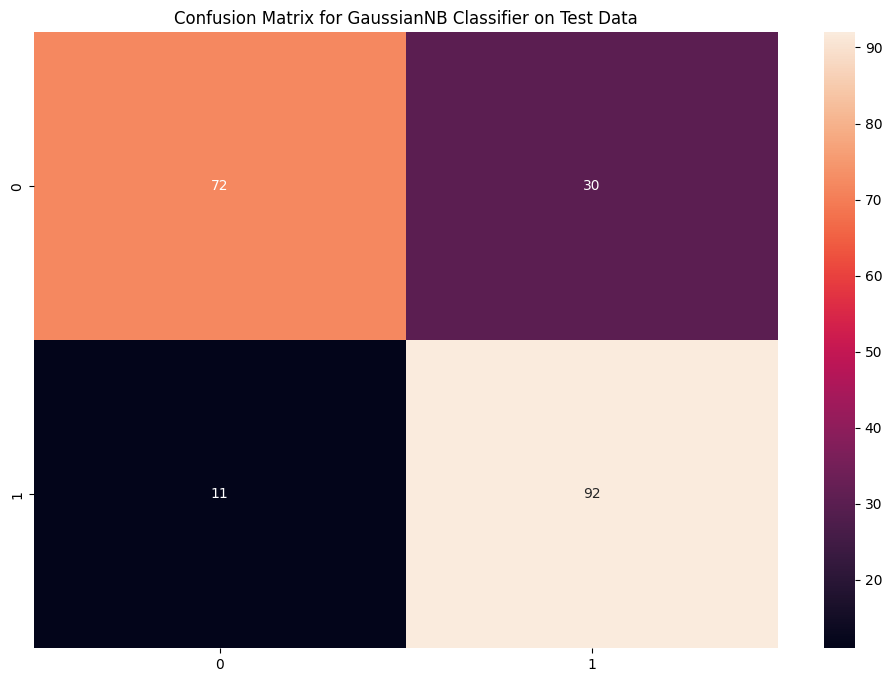

Confusion Matrix:
 [[76 26]
 [ 8 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       102
           1       0.79      0.92      0.85       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

Accuracy on train data by SVC Classifier: 92.6829268292683
Accuracy on test data by SVC Classifier: 83.41463414634146


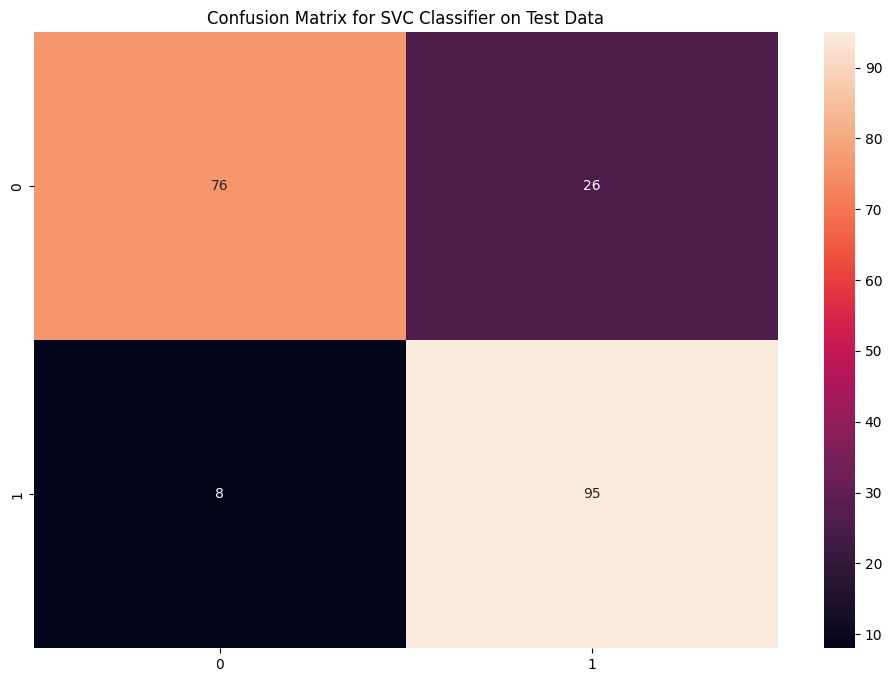

Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy on train data by DecisionTreeClassifier Classifier: 100.0
Accuracy on test data by DecisionTreeClassifier Classifier: 98.53658536585365


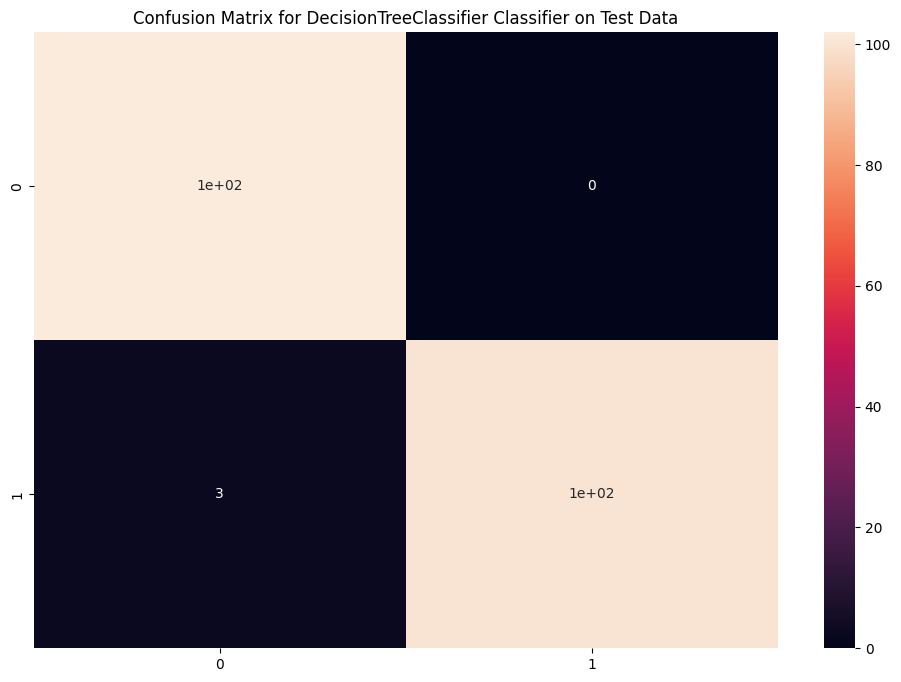

Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Accuracy on train data by LogisticRegression Classifier: 87.1951219512195
Accuracy on test data by LogisticRegression Classifier: 79.51219512195122


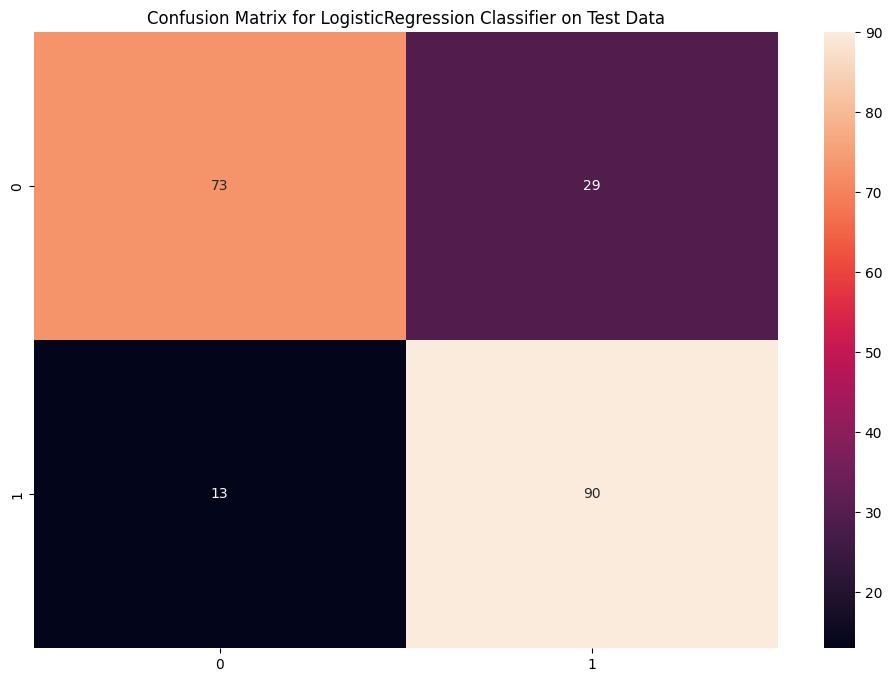

In [20]:
accuracies = { }

# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    # Compute and store accuracy for each model
    train_acc = accuracy_score(y_train, pipeline.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, preds) * 100
    accuracies[model_name] = test_acc

    # Confusion Matrix and Classification Report
    cf_matrix = confusion_matrix(y_test, preds)
    print("Confusion Matrix:\n", cf_matrix)
    print("Classification Report:\n", classification_report(y_test, preds))

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [21]:
print("Accuracies Dictionary:", accuracies)

Accuracies Dictionary: {'KNeighborsClassifier': 80.0, 'GaussianNB': 80.0, 'SVC': 83.41463414634146, 'DecisionTreeClassifier': 98.53658536585365, 'LogisticRegression': 79.51219512195122}


C:\Users\user\AppData\Local\Temp\ipykernel_9044\1212906680.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


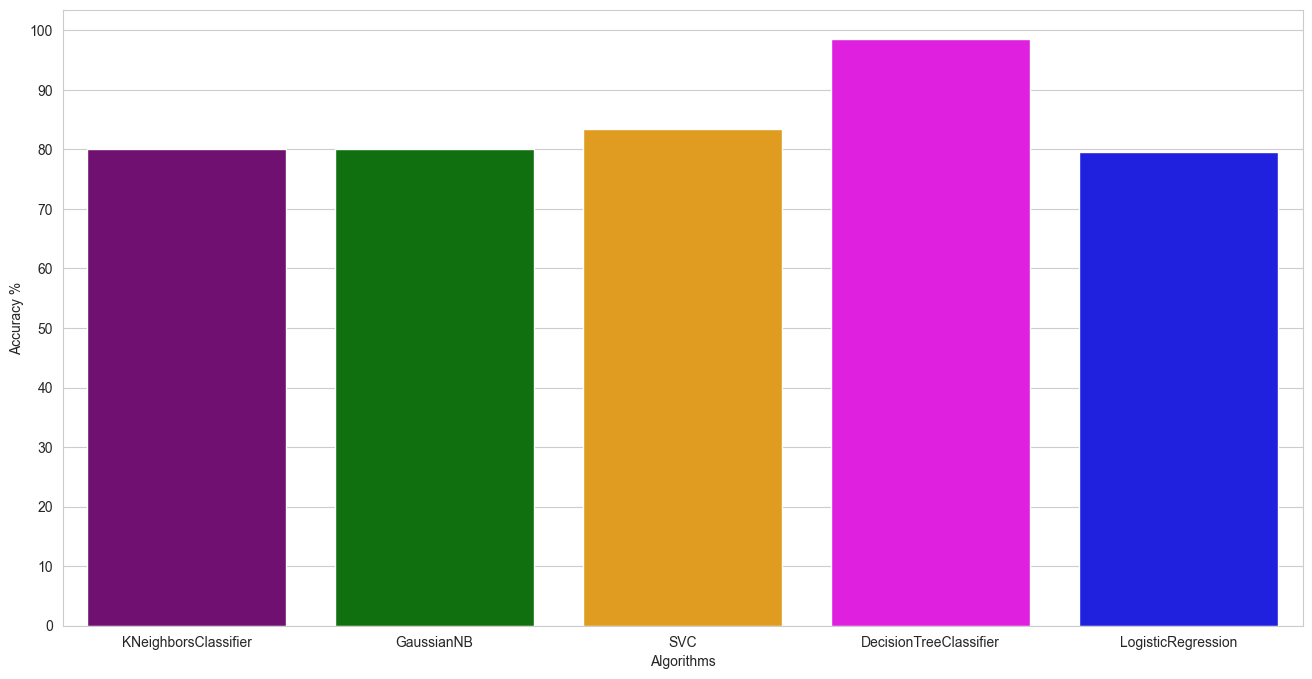

In [22]:
# Adjust the color palette to match the number of algorithms
colors = ["purple", "green", "orange", "magenta","blue","black"][:len(accuracies)]

# Plot with Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0, 120, 10))  # Adjusted y-axis range for accuracies (typically 0 to 100%)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Creating the barplot
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

# Display the plot
plt.show()